# Black Friday– Analysis

In [1]:
import os
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras import losses
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from keras import backend as K
from keras.callbacks import Callback
import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [35]:
data = pd.read_csv("/Users/cynthiamasetto/Documents/Data-Science-Project/3. Black Friday/BlackFriday.csv")

In [36]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [38]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [39]:
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

Because the data has been analysed before there's no need to clean the data

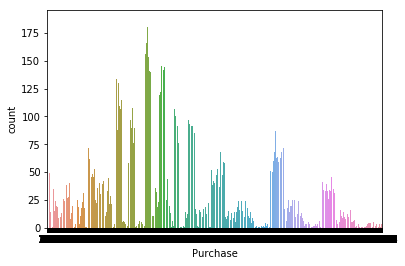

In [8]:
sns.countplot(data['Purchase'])

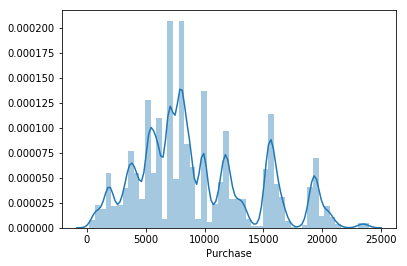

In [9]:
#sns.distplot(data['V1'], kde=False, rug=True);
sns.distplot(data['Purchase'])

In [40]:
data.fillna(0,inplace=True)

In [41]:
for col in data.columns:
    print('{} unique element: {}'.format(col,data[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959


Text(0, 0.5, 'Count')

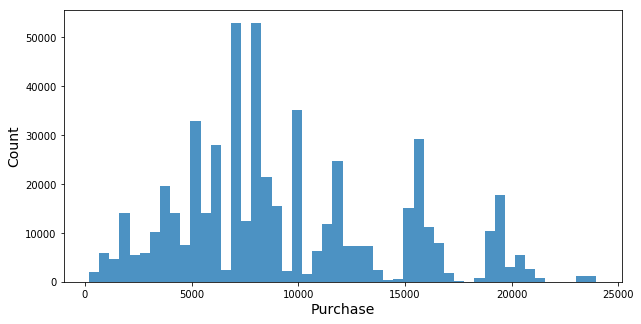

In [42]:
plt.figure(figsize=(10,5))
plt.hist(data['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

Average purchase by user

Text(0.5, 1.0, 'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

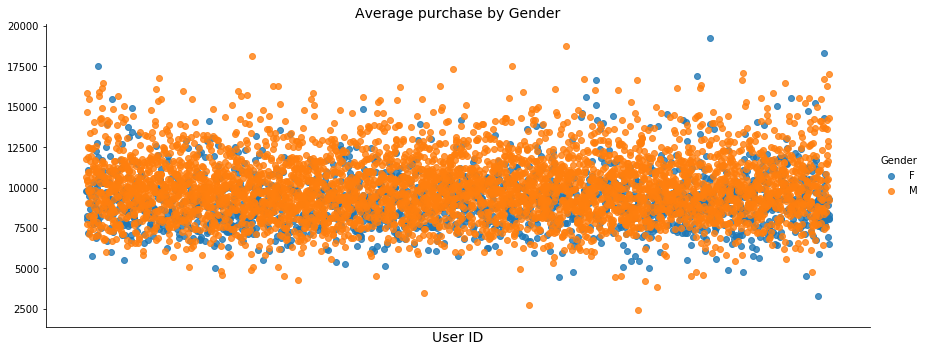

<Figure size 1440x360 with 0 Axes>

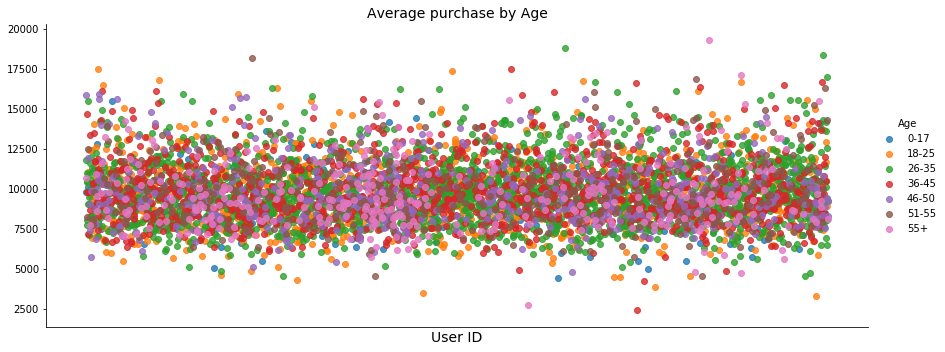

In [43]:
df_Apurchase_by_UID_Gender = data.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_UID_Age = data.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

In [44]:
from sklearn.preprocessing import LabelEncoder
le_U_ID = LabelEncoder()
data['User_ID'] = le_U_ID.fit_transform(data['User_ID'])
le_P_ID = LabelEncoder()
data['Product_ID'] = le_P_ID.fit_transform(data['Product_ID'])
data['Gender'] = np.where(data['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(data.Age)
df_CC = pd.get_dummies(data.City_Category)
df_SIC = pd.get_dummies(data.Stay_In_Current_City_Years)
df_encoded = pd.concat([data,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 49.2+ MB


In [46]:
df_encoded.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,...,51-55,55+,A,B,C,0,1,2,3,4+
0,0,670,0,10,0,3,0.0,0.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [47]:
df_encoded.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,...,51-55,55+,A,B,C,0,1,2,3,4+
count,537577.000000,537577.000000,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,...,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,2912.769436,1692.331275,0.754087,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853,0.027358,...,0.069977,0.038884,0.269055,0.421322,0.309623,0.135283,0.351935,0.185013,0.173579,0.154190
std,1672.497234,1002.576538,0.430627,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133,0.163124,...,0.255108,0.193318,0.443469,0.493771,0.462338,0.342026,0.477574,0.388309,0.378747,0.361131
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1450.000000,927.000000,1.000000,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2950.000000,1646.000000,1.000000,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4304.000000,2534.000000,1.000000,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5890.000000,3622.000000,1.000000,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_encoded['Purchase'] = np.where(data['Purchase']>10000,1,0) # purchases bigger than 10000



In [49]:
df_encoded.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,...,51-55,55+,A,B,C,0,1,2,3,4+
0,0,670,0,10,0,3,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,2374,0,10,0,1,6.0,14.0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,0,850,0,10,0,12,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,826,0,10,0,12,14.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,2732,1,16,0,8,0.0,0.0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [50]:
train = df_encoded

# Prediction with feature reduction / autoencoder and classificaiton
First autoencoders are used to do classification

In [51]:
train_df, test_df = train_test_split(train, test_size=0.2)
train_df.shape, test_df.shape

((430061, 24), (107516, 24))

In [53]:
#Training data
x_train = train_df.drop(['Purchase', 'User_ID',"Product_ID"], axis = 1).values
y_train = train_df["Purchase"].values

#Testing data
x_test = test_df.drop(['Purchase', 'User_ID',"Product_ID"], axis = 1).values
y_test = test_df["Purchase"].values

In [54]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((430061, 21), (430061,), (107516, 21), (107516,))

In [56]:
from keras import regularizers
## input layer 
input_layer = Input(shape=(x_train.shape[1],))

## encoding part
encoded = Dense(20, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(12, activation='relu')(encoded)

## decoding part
decoded = Dense(12, activation='tanh')(encoded)
decoded = Dense(20, activation='tanh')(decoded)

## output layer
output_layer = Dense(x_train.shape[1], activation='relu')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [57]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [58]:
#Normalizing the data
from keras import regularizers
from sklearn import preprocessing
x_train = pd.DataFrame(x_train)#.values)
x_train = preprocessing.MinMaxScaler().fit_transform(x_train.values)

In [59]:
x_train.shape, x_test.shape

((430061, 21), (107516, 21))

In [60]:
autoencoder.fit(x_train, x_train, 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20)# =(x_test,x_test))


Instructions for updating:
Use tf.cast instead.
Train on 344048 samples, validate on 86013 samples
Epoch 1/10
344048/344048 [==============================] - 5s 16us/step - loss: 0.0935 - val_loss: 0.0527
Epoch 2/10
344048/344048 [==============================] - 4s 11us/step - loss: 0.0441 - val_loss: 0.0353
Epoch 3/10
344048/344048 [==============================] - 3s 10us/step - loss: 0.0353 - val_loss: 0.0468
Epoch 4/10
344048/344048 [==============================] - 3s 10us/step - loss: 0.0322 - val_loss: 0.0289
Epoch 5/10
344048/344048 [==============================] - 4s 11us/step - loss: 0.0302 - val_loss: 0.0284
Epoch 6/10
344048/344048 [==============================] - 4s 11us/step - loss: 0.0294 - val_loss: 0.0262
Epoch 7/10
344048/344048 [==============================] - 4s 12us/step - loss: 0.0291 - val_loss: 0.0271
Epoch 8/10
344048/344048 [==============================] - 4s 12us/step - loss: 0.0286 - val_loss: 0.0267
Epoch 9/10
344048/344048 [===================

In [61]:
features = Sequential()
features.add(autoencoder.layers[0])
features.add(autoencoder.layers[1])

In [62]:
features.compile(optimizer="adadelta", loss="mse")

In [63]:
#Reduced features
predict = pd.DataFrame(features.predict(x_train))

In [64]:
predict = predict.add_prefix('Feature_')
predict.shape

(430061, 20)

In [65]:
predict['target'] = y_train

In [66]:
predict.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,target
0,0.012920,0.000381,0.001214,-0.035773,-0.004334,-0.045056,0.000242,-0.000053,-0.022289,-0.042570,...,-0.001580,0.001736,-0.048017,-0.000397,0.000564,0.000302,-0.000030,-0.000693,0.000010,0
1,-0.029734,-0.002277,-0.001080,-0.130583,-0.022130,-0.056932,-0.004144,-0.005462,-0.007395,-0.054590,...,0.053641,0.052564,-0.034526,-0.007550,-0.002751,0.000016,0.000553,0.001379,-0.001362,1
2,-0.005273,0.011665,0.012351,0.048563,-0.012982,-0.056186,0.010935,0.011429,-0.000872,-0.002889,...,0.050034,-0.048341,0.000932,0.013272,0.011430,-0.003866,-0.011160,-0.011984,0.011183,0
3,0.018360,0.009222,0.009556,0.035300,0.002067,0.011552,0.009043,0.008853,-0.086432,-0.012694,...,0.051034,-0.002291,0.014034,0.009867,0.009096,0.000127,-0.008575,-0.008537,0.008950,0
4,-0.023987,0.006909,0.007572,-0.007472,-0.005284,0.051875,0.006228,0.006066,-0.059802,-0.026916,...,0.000503,0.048346,-0.063443,0.006320,0.006450,0.005841,-0.006123,-0.002937,0.005424,0


In [67]:
predict_test = pd.DataFrame(features.predict(x_test))

In [68]:
predict_test = predict_test.add_prefix('Feature_')
predict_test.shape

(107516, 20)

In [69]:
predict_test['target'] = y_test

In [70]:
predict_test.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,target
0,0.144793,-0.088467,-0.080162,-0.919836,0.009736,0.246630,-0.101791,-0.106588,0.091816,-0.062129,...,0.067880,-0.005571,-0.063174,-0.130300,-0.091503,0.005785,0.076798,0.098276,-0.084764,0
1,0.206589,-0.204718,-0.196773,-0.975466,0.041936,0.146293,-0.211247,-0.223937,0.170044,0.026702,...,0.061383,-0.006691,-0.087208,-0.267432,-0.200286,0.010098,0.183254,0.178725,-0.188836,1
2,-0.045935,-0.117263,-0.109923,-0.873366,0.067089,-0.235999,-0.123725,-0.129796,-0.053096,-0.017480,...,0.003737,0.008169,0.000965,-0.156898,-0.115272,-0.003601,0.100395,0.101977,-0.105367,0
3,-0.046305,-0.189912,-0.182281,-0.968317,0.002374,-0.268961,-0.195867,-0.207505,-0.025876,0.035073,...,0.058594,0.057814,-0.034242,-0.249804,-0.185564,-0.002373,0.165715,0.163109,-0.171204,0
4,0.023312,-0.349219,-0.337346,-0.999035,-0.047908,-0.437546,-0.357865,-0.376785,-0.059891,-0.058521,...,0.013893,0.011497,-0.010295,-0.447056,-0.341748,-0.010377,0.308972,0.303071,-0.316291,0


### Linear classifier
In this case I'm going to use SVM as discussed in the paper

In [71]:
train = predict
test = predict_test

In [72]:
X = train.drop(['target'], axis = 1).values
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((322545, 20), (107516, 20), (322545,), (107516,))

In [73]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [76]:
cm

array([[60850,  9320],
       [21657, 15689]])

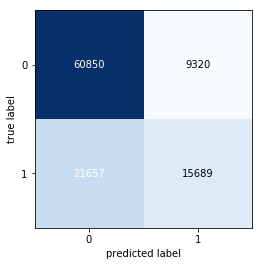

In [77]:
#Confusion Matrix Graph
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
#Making the Confusion Matrix
# confusion_matrix is a function
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support
cm = confusion_matrix(y_test,y_pred)
k_stat = cohen_kappa_score(y_test,y_pred)
score = precision_recall_fscore_support(y_test,y_pred)

In [ ]:
score

(array([0.73751318, 0.62733416]),
 array([0.86717971, 0.42009854]),
 array([0.79710762, 0.50321546]),
 array([70170, 37346]))

In [ ]:
#Applying k-fold crossvalidation
from sklearn.model_selection import cross_val_score, cross_validate
accuracies = cross_val_score(estimator = classifier,X = X_train, y = y_train, cv = 10)
stats = cross_validate(estimator = classifier,X = X_train, y = y_train, cv = 10)
mean_ac= accuracies.mean()
std_ac= accuracies.std()

In [ ]:
accuracies

In [ ]:
stats

In [ ]:
mean_ac

In [ ]:
roc_auc_score(y_test, y_pred)